In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training for Eyes

In [ ]:
import os
os.listdir("eye-data/train")

['closed', 'open']

In [ ]:
eye_class_names = ["closed", "open"]

train_path = "eye-data/train"
valid_path = "eye-data/valid"
test_path = "eye-data/test"

In [ ]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, shear_range=0.2, zoom_range=0.2, horizontal_flip=True).flow_from_directory(directory=train_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
valid_data = data_gen.flow_from_directory(directory=valid_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
test_data = data_gen.flow_from_directory(directory=test_path, target_size=(100, 100), classes=eye_class_names, batch_size=5, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 700 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


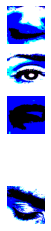

In [ ]:
imgs, labels = next(train_data)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.axis("off")
    plt.imshow(imgs[i], cmap=plt.cm.binary)
print(labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dropout (Dropout)           (None, 40000)             0

In [ ]:
K = tf.keras.backend
K.clear_session()
tf.random.set_seed(10)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10) # stop if no improvement in 10 consecutive epochs
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("eye-model.h5", save_best_only=True) # save the best outcome so far

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_data, validation_data=valid_data, epochs=100, verbose=2, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
280/280 - 594s - loss: 1.8689 - accuracy: 0.7850 - val_loss: 0.7927 - val_accuracy: 0.9286 - 594s/epoch - 2s/step
Epoch 2/100
280/280 - 15s - loss: 0.7839 - accuracy: 0.9007 - val_loss: 0.6484 - val_accuracy: 0.9529 - 15s/epoch - 55ms/step
Epoch 3/100
280/280 - 15s - loss: 0.7872 - accuracy: 0.9043 - val_loss: 0.6854 - val_accuracy: 0.9414 - 15s/epoch - 54ms/step
Epoch 4/100
280/280 - 15s - loss: 0.6911 - accuracy: 0.9171 - val_loss: 0.6546 - val_accuracy: 0.9386 - 15s/epoch - 53ms/step
Epoch 5/100
280/280 - 15s - loss: 0.6586 - accuracy: 0.9414 - val_loss: 0.6787 - val_accuracy: 0.9243 - 15s/epoch - 53ms/step
Epoch 6/100
280/280 - 16s - loss: 0.7000 - accuracy: 0.9271 - val_loss: 0.6332 - val_accuracy: 0.9614 - 16s/epoch - 57ms/step
Epoch 7/100
280/280 - 16s - loss: 0.6862 - accuracy: 0.9329 - val_loss: 0.5217 - val_accuracy: 0.9671 - 16s/epoch - 56ms/step
Epoch 8/100
280/280 - 16s - loss: 0.5667 - accuracy: 0.9414 - val_loss: 0.4556 - val_accuracy: 0.9700 - 16s/epoch - 56

In [ ]:
predictions = model.predict(x=test_data, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

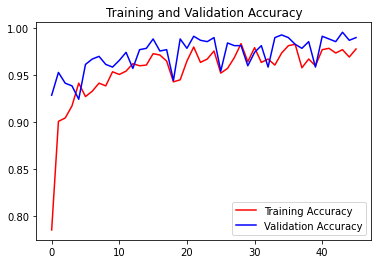

In [ ]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

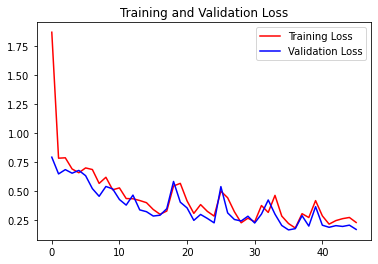

In [ ]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
cm = confusion_matrix(y_true=test_data.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="red" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[175   0]
 [  3 172]]


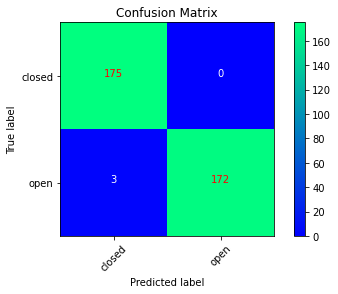

In [ ]:
plot_confusion_matrix(cm=cm, classes=eye_class_names, title="Confusion Matrix")

In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/eye-model.h5")

# Training for Yawns

In [5]:
yawn_class_names = ["no_yawn", "yawn"]

train_path = "yawn-data/train"
valid_path = "yawn-data/valid"
test_path = "yawn-data/test"


In [6]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, shear_range=0.2, zoom_range=0.2, horizontal_flip=True).flow_from_directory(directory=train_path, target_size=(400, 600), classes=yawn_class_names, batch_size=10)
valid_data = data_gen.flow_from_directory(directory=valid_path, target_size=(400, 600), classes=yawn_class_names, batch_size=10)
test_data = data_gen.flow_from_directory(directory=test_path, target_size=(400, 600), classes=yawn_class_names, batch_size=10, shuffle=False)


Found 1400 images belonging to 2 classes.
Found 700 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


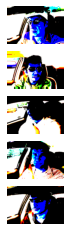

In [ ]:
imgs, labels = next(train_data)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.axis("off")
    plt.imshow(imgs[i], cmap=plt.cm.binary)
print(labels)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(400, 600, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dense(units=2, activation='softmax'))


In [ ]:
model.summary()
# tf.keras.utils.plot_model(model, "yawn_model.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 600, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 300, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 150, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 75, 32)       0

In [ ]:
K = tf.keras.backend
K.clear_session()
tf.random.set_seed(10)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10) # stop if no improvement in 10 consecutive epochs
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("yawn-model.h5", save_best_only=True) # save the best outcome so far

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
history = model.fit(x=train_data, validation_data=valid_data, epochs=100, verbose=2, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
140/140 - 947s - loss: 5.0211 - accuracy: 0.5679 - val_loss: 1.9023 - val_accuracy: 0.6271 - 947s/epoch - 7s/step
Epoch 2/100
140/140 - 95s - loss: 1.7631 - accuracy: 0.6279 - val_loss: 1.6422 - val_accuracy: 0.6786 - 95s/epoch - 677ms/step
Epoch 3/100
140/140 - 93s - loss: 1.5837 - accuracy: 0.6500 - val_loss: 1.4610 - val_accuracy: 0.6957 - 93s/epoch - 666ms/step
Epoch 4/100
140/140 - 93s - loss: 1.4468 - accuracy: 0.6600 - val_loss: 1.4336 - val_accuracy: 0.6714 - 93s/epoch - 662ms/step
Epoch 5/100
140/140 - 93s - loss: 1.3841 - accuracy: 0.6886 - val_loss: 1.2923 - val_accuracy: 0.7114 - 93s/epoch - 665ms/step
Epoch 6/100
140/140 - 93s - loss: 1.3058 - accuracy: 0.6900 - val_loss: 1.1569 - val_accuracy: 0.7971 - 93s/epoch - 668ms/step
Epoch 7/100
140/140 - 95s - loss: 1.2117 - accuracy: 0.7279 - val_loss: 1.0864 - val_accuracy: 0.7886 - 95s/epoch - 678ms/step
Epoch 8/100
140/140 - 95s - loss: 1.1448 - accuracy: 0.7557 - val_loss: 1.0703 - val_accuracy: 0.8243 - 95s/epoc

In [7]:
predictions = model.predict(x=test_data, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

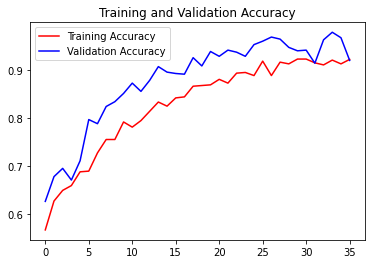

In [ ]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

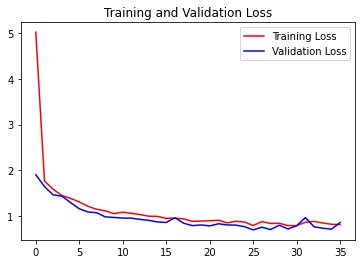

In [ ]:

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Confusion matrix, without normalization
[[175   0]
 [  3 172]]


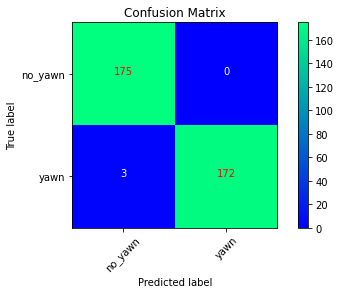

In [ ]:
plot_confusion_matrix(cm=cm, classes=yawn_class_names, title="Confusion Matrix")

In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/yawn-model.h5")